In [ ]:
!pip install konlpy
!pip install networkx
!pip install apyori
!pip install pyLDAvis==2.1.2
!pip install wordcloud
!pip install twitter
!pip install gensim
!pip install openpyxl
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 기본 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib as mpl
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import re
import pickle 
import openpyxl
from IPython.display import set_matplotlib_formats 

# 불용어
import nltk
nltk.download('stopwords')

# konlpy
from konlpy.tag import Okt
okt = Okt()
from konlpy.tag import Twitter
twitter = Twitter()

# counter
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer

# wordcloud
from wordcloud import WordCloud 

# lda
from gensim import corpora, models
from gensim.models import CoherenceModel
import gensim
import pyLDAvis.gensim
import pyLDAvis

# sna
import networkx as nx
from apyori import apriori

#각종 패키지 삽입
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import pandas as pd
import re

#LDA 라이브러리 import
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# vectorize & lda에 필요한 library
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim  # gensim의 ldamodel에 최적화된 라이브러리

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package sto

In [ ]:
#colab에 데이터 넣기
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 크림_브랜드별_신발_제품.csv to 크림_브랜드별_신발_제품 (2).csv
User uploaded file "크림_브랜드별_신발_제품.csv" with length 2108919 bytes


In [ ]:
#데이터 불러오기
data=pd.read_csv('크림_브랜드별_신발_제품.csv')
data.head()

검색어          브랜드                                                제품명  \
0      A.P.C.         Nike               Nike x A.P.C. Dunk High '08 SP Beige   
1      A.P.C.         Nike  Nike x A.P.C. Blazer Mid Vintage White Midnigh...   
2  Ader Error         Puma                    Puma x Ader Error Vaderon White   
3  Ader Error  Birkenstock                Birkenstock x Ader Error A630 Black   
4  Ader Error       Camper  (W) Camper x Ader Error Proto-111-S Cinder Bas...   

                                제품한글명        가격  거래량   관심수  \
0          나이키 x 아페쎄 덩크 하이 '08 SP 베이지  280,000원    1    57   
1  나이키 x 아페쎄 블레이저 미드 빈티지 화이트 미드나잇 네이비         -  NaN    17   
2                                 NaN  260,000원  530  2352   
3                                 NaN  220,000원  311  1400   
4                                 NaN  410,000원   21   134   

                                  url  
0  https://kream.co.kr/products/34916  
1   https://kream.co.kr/products/3841  
2  https://kream.co.kr/products/54312  
3  https://kream.co.kr/products/62262  
4  https://kream.co.kr/products/36842

In [ ]:
# 거래량 전처리
data["거래량"]=data["거래량"].fillna(0)
data["거래량"]=pd.DataFrame(data["거래량"].str.replace(',',''))
data["거래량"]=pd.DataFrame(data["거래량"].str.replace('.',''))
data["거래량"]=pd.DataFrame(data["거래량"].str.replace('만',"000"))
data["거래량"]=pd.to_numeric(data["거래량"])

#관심수 전처리
data["관심수"]=pd.DataFrame(data["관심수"].str.replace(',',''))
data["관심수"]=pd.DataFrame(data["관심수"].str.replace('.',''))
data["관심수"]=pd.DataFrame(data["관심수"].str.replace('만',"000"))
data["관심수"]=pd.to_numeric(data["관심수"])

#크롤링 잘못된 'Camper' 데이터 삭제
drop_index=data[data['검색어']=='Camper'].index
data=data.drop(drop_index)
data.sort_values('관심수',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


검색어                  브랜드  \
8638                  Nike                 Nike   
8639                  Nike                 Nike   
2877                Jordan               Jordan   
2875                Jordan               Jordan   
8644                  Nike                 Nike   
...                    ...                  ...   
18005        Saint Laurent        Saint Laurent   
16080                 Nike                 Nike   
16079                 Nike                 Nike   
10377                 Nike                 Nike   
18196  Salvatore Ferragamo  Salvatore Ferragamo   

                                                     제품명 제품한글명        가격  \
8638                           Nike Dunk Low Retro Black   NaN  173,000원   
8639                      Nike Air Force 1 '07 Low White   NaN  140,000원   
2877                    (W) Jordan 1 Low White Wolf Grey   NaN  298,000원   
2875                          (W) Jordan 1 Mid Wolf Grey   NaN  239,000원   
8644                  (W) Nike Air Force 1 '07 Low White   NaN  134,000원   
...                                                  ...   ...       ...   
18005  Saint Laurent Venice Sneakers in Canvas Off Wh...   NaN         -   
16080     Nike Air Zoom Elite 8 Total Orange Ghost Green   NaN         -   
16079         Nike Air Huarache Cool Grey Bright Crimson   NaN         -   
10377                (GS) Nike Air Max Tavas Black White   NaN   96,000원   
18196  (W) Salvatore Ferragamo Jelly Ballet Flat with...   NaN  245,000원   

            거래량     관심수                                 url  
8638   195000.0  104000  https://kream.co.kr/products/28029  
8639   117000.0   98000  https://kream.co.kr/products/12831  
2877    28000.0   61000  https://kream.co.kr/products/36237  
2875    18000.0   58000  https://kream.co.kr/products/37241  
8644    58000.0   57000  https://kream.co.kr/products/13100  
...         ...     ...                                 ...  
18005       NaN       0  https://kream.co.kr/products/67375  
16080       NaN       0  https://kream.co.kr/products/42346  
16079       NaN       0  https://kream.co.kr/products/42370  
10377       NaN       0  https://kream.co.kr/products/43667  
18196       NaN       0  https://kream.co.kr/products/69654  

[20144 rows x 8 columns]

In [ ]:
#가중치 부여
data['거래량']=data['거래량'].fillna(0)
data['가중치']=data['거래량']*0.6+data['관심수']*0.4
data

검색어          브랜드  \
0          A.P.C.         Nike   
1          A.P.C.         Nike   
2      Ader Error         Puma   
3      Ader Error  Birkenstock   
4      Ader Error       Camper   
...           ...          ...   
20179       Yeezy       Adidas   
20180       Yeezy       Adidas   
20181       Yeezy       Adidas   
20182       Yeezy       Adidas   
20183       Yeezy         Nike   

                                                     제품명  \
0                   Nike x A.P.C. Dunk High '08 SP Beige   
1      Nike x A.P.C. Blazer Mid Vintage White Midnigh...   
2                        Puma x Ader Error Vaderon White   
3                    Birkenstock x Ader Error A630 Black   
4      (W) Camper x Ader Error Proto-111-S Cinder Bas...   
...                                                  ...   
20179          (Kids) Adidas Yeezy Boost 350 V2 Lundmark   
20180                      (W) Adidas Yeezy 950 Moonrock   
20181                   (W) Adidas Yeezy 950 Turtle Dove   
20182                            Adidas Yeezy 950 Peyote   
20183                         Nike Air Yeezy 2 Solar Red   

                                    제품한글명        가격    거래량   관심수  \
0              나이키 x 아페쎄 덩크 하이 '08 SP 베이지  280,000원    1.0    57   
1      나이키 x 아페쎄 블레이저 미드 빈티지 화이트 미드나잇 네이비         -    0.0    17   
2                                     NaN  260,000원  530.0  2352   
3                                     NaN  220,000원  311.0  1400   
4                                     NaN  410,000원   21.0   134   
...                                   ...       ...    ...   ...   
20179                                 NaN         -    0.0     8   
20180                                 NaN         -    0.0     3   
20181                                 NaN         -    0.0     2   
20182                                 NaN         -    0.0     8   
20183                                 NaN         -    0.0   139   

                                      url     가중치  
0      https://kream.co.kr/products/34916    23.4  
1       https://kream.co.kr/products/3841     6.8  
2      https://kream.co.kr/products/54312  1258.8  
3      https://kream.co.kr/products/62262   746.6  
4      https://kream.co.kr/products/36842    66.2  
...                                   ...     ...  
20179  https://kream.co.kr/products/21255     3.2  
20180   https://kream.co.kr/products/5831     1.2  
20181   https://kream.co.kr/products/5829     0.8  
20182   https://kream.co.kr/products/5828     3.2  
20183   https://kream.co.kr/products/2745    55.6  

[20144 rows x 9 columns]

In [ ]:
# 가중치 기준 브랜드 뽑아내기
sorted_data=data.groupby(["브랜드"]).mean().sort_values(by=['가중치'],ascending=False)
sorted_data

거래량         관심수         가중치
브랜드                                             
Jordan        408.652553  829.674531  577.061345
New Balance   346.638095  388.590476  363.419048
Nike          239.256877  481.111149  335.998585
Converse      138.934211  445.893725  261.718016
Adidas          9.384473  524.441774  215.407394
...                  ...         ...         ...
Valentino       0.000000    1.000000    0.400000
Fendi           0.000000    0.800000    0.320000
Roger Vivier    0.000000    0.690476    0.276190
Marni           0.000000    0.666667    0.266667
Kenzo           0.000000    0.000000    0.000000

[65 rows x 3 columns]

In [ ]:
#워드 클라우딩 할 브랜드 추출 
brand_list=sorted_data.index
brand_list

Index(['Jordan', 'New Balance', 'Nike', 'Converse', 'Adidas', 'Camper',
       'Oofos', 'Autry', 'Asics', 'Louis Vuitton', 'Maison Margiela',
       'Common Projects', 'Crocs', 'Keen', 'Salomon', 'Hoka One One',
       'Mihara Yasuhiro', 'Ader Error', 'Birkenstock', 'Y-3', 'Vans',
       'Alexander McQueen', 'Chanel', 'Golden Goose', 'Merrell', 'Balenciaga',
       'Dior', 'Supreme', 'Reebok', 'Dr. Martens', 'Puma', 'Mizuno', 'Hermes',
       'Palace', 'Bottega Veneta', 'Clarks', 'Axel Arigato', 'Timberland',
       'Essentials', 'Yeezy', 'Lemaire', 'Prada', 'BAPE', 'Celine', 'Sunnei',
       'Suicoke', 'Miu Miu', 'Gucci', 'Saint Laurent', 'Loewe', 'Burberry',
       'G/Fore', 'Jil Sander', 'Thom Browne', 'Barbour', 'Gallery Dept.',
       'Tod's', 'Moncler', 'Isabel Marant', 'Salvatore Ferragamo', 'Valentino',
       'Fendi', 'Roger Vivier', 'Marni', 'Kenzo'],
      dtype='object', name='브랜드')

In [ ]:
# LDA / SNA 용 상위 10개, 하위 10개 브랜드명 추출
Top10_brand=brand_list[:10]
print(Top10_brand)
Low10_brand=brand_list[55:]
print(Low10_brand)

Index(['Jordan', 'New Balance', 'Nike', 'Converse', 'Adidas', 'Camper',
       'Oofos', 'Autry', 'Asics', 'Louis Vuitton'],
      dtype='object', name='브랜드')
Index(['Gallery Dept.', 'Tod's', 'Moncler', 'Isabel Marant',
       'Salvatore Ferragamo', 'Valentino', 'Fendi', 'Roger Vivier', 'Marni',
       'Kenzo'],
      dtype='object', name='브랜드')


In [ ]:
#제품명 전처리
data["제품명"]=pd.DataFrame(data["제품명"].str.replace('.',''))
data["제품명"]=pd.DataFrame(data["제품명"].str.replace('x',''))
data["제품명"]=pd.DataFrame(data["제품명"].str.replace("\(W\)",''))
data["제품명"]=pd.DataFrame(data["제품명"].str.replace('&',''))
data["제품명"]=pd.DataFrame(data["제품명"].str.replace('-',''))
data

<input>:4: DeprecationWarning: invalid escape sequence \(
<input>:4: DeprecationWarning: invalid escape sequence \(
<input>:4: DeprecationWarning: invalid escape sequence \(
<input>:4: DeprecationWarning: invalid escape sequence \(
<ipython-input-11-458f8e25c4a4>:4: DeprecationWarning: invalid escape sequence \(
  data["제품명"]=pd.DataFrame(data["제품명"].str.replace("\(W\)",''))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


검색어          브랜드  \
0          A.P.C.         Nike   
1          A.P.C.         Nike   
2      Ader Error         Puma   
3      Ader Error  Birkenstock   
4      Ader Error       Camper   
...           ...          ...   
20179       Yeezy       Adidas   
20180       Yeezy       Adidas   
20181       Yeezy       Adidas   
20182       Yeezy       Adidas   
20183       Yeezy         Nike   

                                                     제품명  \
0                       Nike  APC Dunk High '08 SP Beige   
1       Nike  APC Blazer Mid Vintage White Midnight Navy   
2                         Puma  Ader Error Vaderon White   
3                     Birkenstock  Ader Error A630 Black   
4       Camper  Ader Error Proto111S Cinder Basic Sne...   
...                                                  ...   
20179          (Kids) Adidas Yeezy Boost 350 V2 Lundmark   
20180                          Adidas Yeezy 950 Moonrock   
20181                       Adidas Yeezy 950 Turtle Dove   
20182                            Adidas Yeezy 950 Peyote   
20183                         Nike Air Yeezy 2 Solar Red   

                                    제품한글명        가격    거래량   관심수  \
0              나이키 x 아페쎄 덩크 하이 '08 SP 베이지  280,000원    1.0    57   
1      나이키 x 아페쎄 블레이저 미드 빈티지 화이트 미드나잇 네이비         -    0.0    17   
2                                     NaN  260,000원  530.0  2352   
3                                     NaN  220,000원  311.0  1400   
4                                     NaN  410,000원   21.0   134   
...                                   ...       ...    ...   ...   
20179                                 NaN         -    0.0     8   
20180                                 NaN         -    0.0     3   
20181                                 NaN         -    0.0     2   
20182                                 NaN         -    0.0     8   
20183                                 NaN         -    0.0   139   

                                      url     가중치  
0      https://kream.co.kr/products/34916    23.4  
1       https://kream.co.kr/products/3841     6.8  
2      https://kream.co.kr/products/54312  1258.8  
3      https://kream.co.kr/products/62262   746.6  
4      https://kream.co.kr/products/36842    66.2  
...                                   ...     ...  
20179  https://kream.co.kr/products/21255     3.2  
20180   https://kream.co.kr/products/5831     1.2  
20181   https://kream.co.kr/products/5829     0.8  
20182   https://kream.co.kr/products/5828     3.2  
20183   https://kream.co.kr/products/2745    55.6  

[20144 rows x 9 columns]

# 1. **SNA** **분석**

In [ ]:
def tokenize_text(text):
    result=[]
    text = re.sub(r'[0-9]+','', text)
    text=text.replace('(','')
    text=text.replace(')','')
    text=text.replace('?','')
    text=text.replace('_','')
    text=text.lower()
    text=tokenizer.tokenize(text)
    for noun in text :
      if len(noun)>1:
        result.append(noun)
    return result

In [ ]:
# Jorden
tokenizer = TreebankWordTokenizer()

data2_index=(data['브랜드']==Top10_brand[0])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[0],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)
df.head(10)

items   support  \
84      (gs, retro)  0.124758   
90    (high, retro)  0.103426   
94     (retro, low)  0.064318   
105     (og, retro)  0.063995   
61   (retro, black)  0.053329   
89       (high, og)  0.052683   
112     (td, retro)  0.043310   
100       (mid, se)  0.042340   
80        (gs, low)  0.039754   
113  (retro, white)  0.039108   

                                    ordered_statistics  length  
84   [((), (gs, retro), 0.12475759534583064, 1.0), ...       2  
90   [((), (high, retro), 0.10342598577892695, 1.0)...       2  
94   [((), (retro, low), 0.0643180349062702, 1.0), ...       2  
105  [((), (og, retro), 0.06399482870071105, 1.0), ...       2  
61   [((), (retro, black), 0.05332902391725921, 1.0...       2  
89   [((), (high, og), 0.05268261150614092, 1.0), (...       2  
112  [((), (td, retro), 0.04330963154492566, 1.0), ...       2  
100  [((), (mid, se), 0.042340012928248225, 1.0), (...       2  
80   [((), (gs, low), 0.039754363283775046, 1.0), (...       2  
113  [((), (retro, white), 0.039107950872656755, 1....       2

In [ ]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

In [ ]:
#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


In [ ]:
pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

Jorden

-----------------------------------



findfont: Font family ['KoPubDotum'] not found. Falling back to DejaVu Sans.


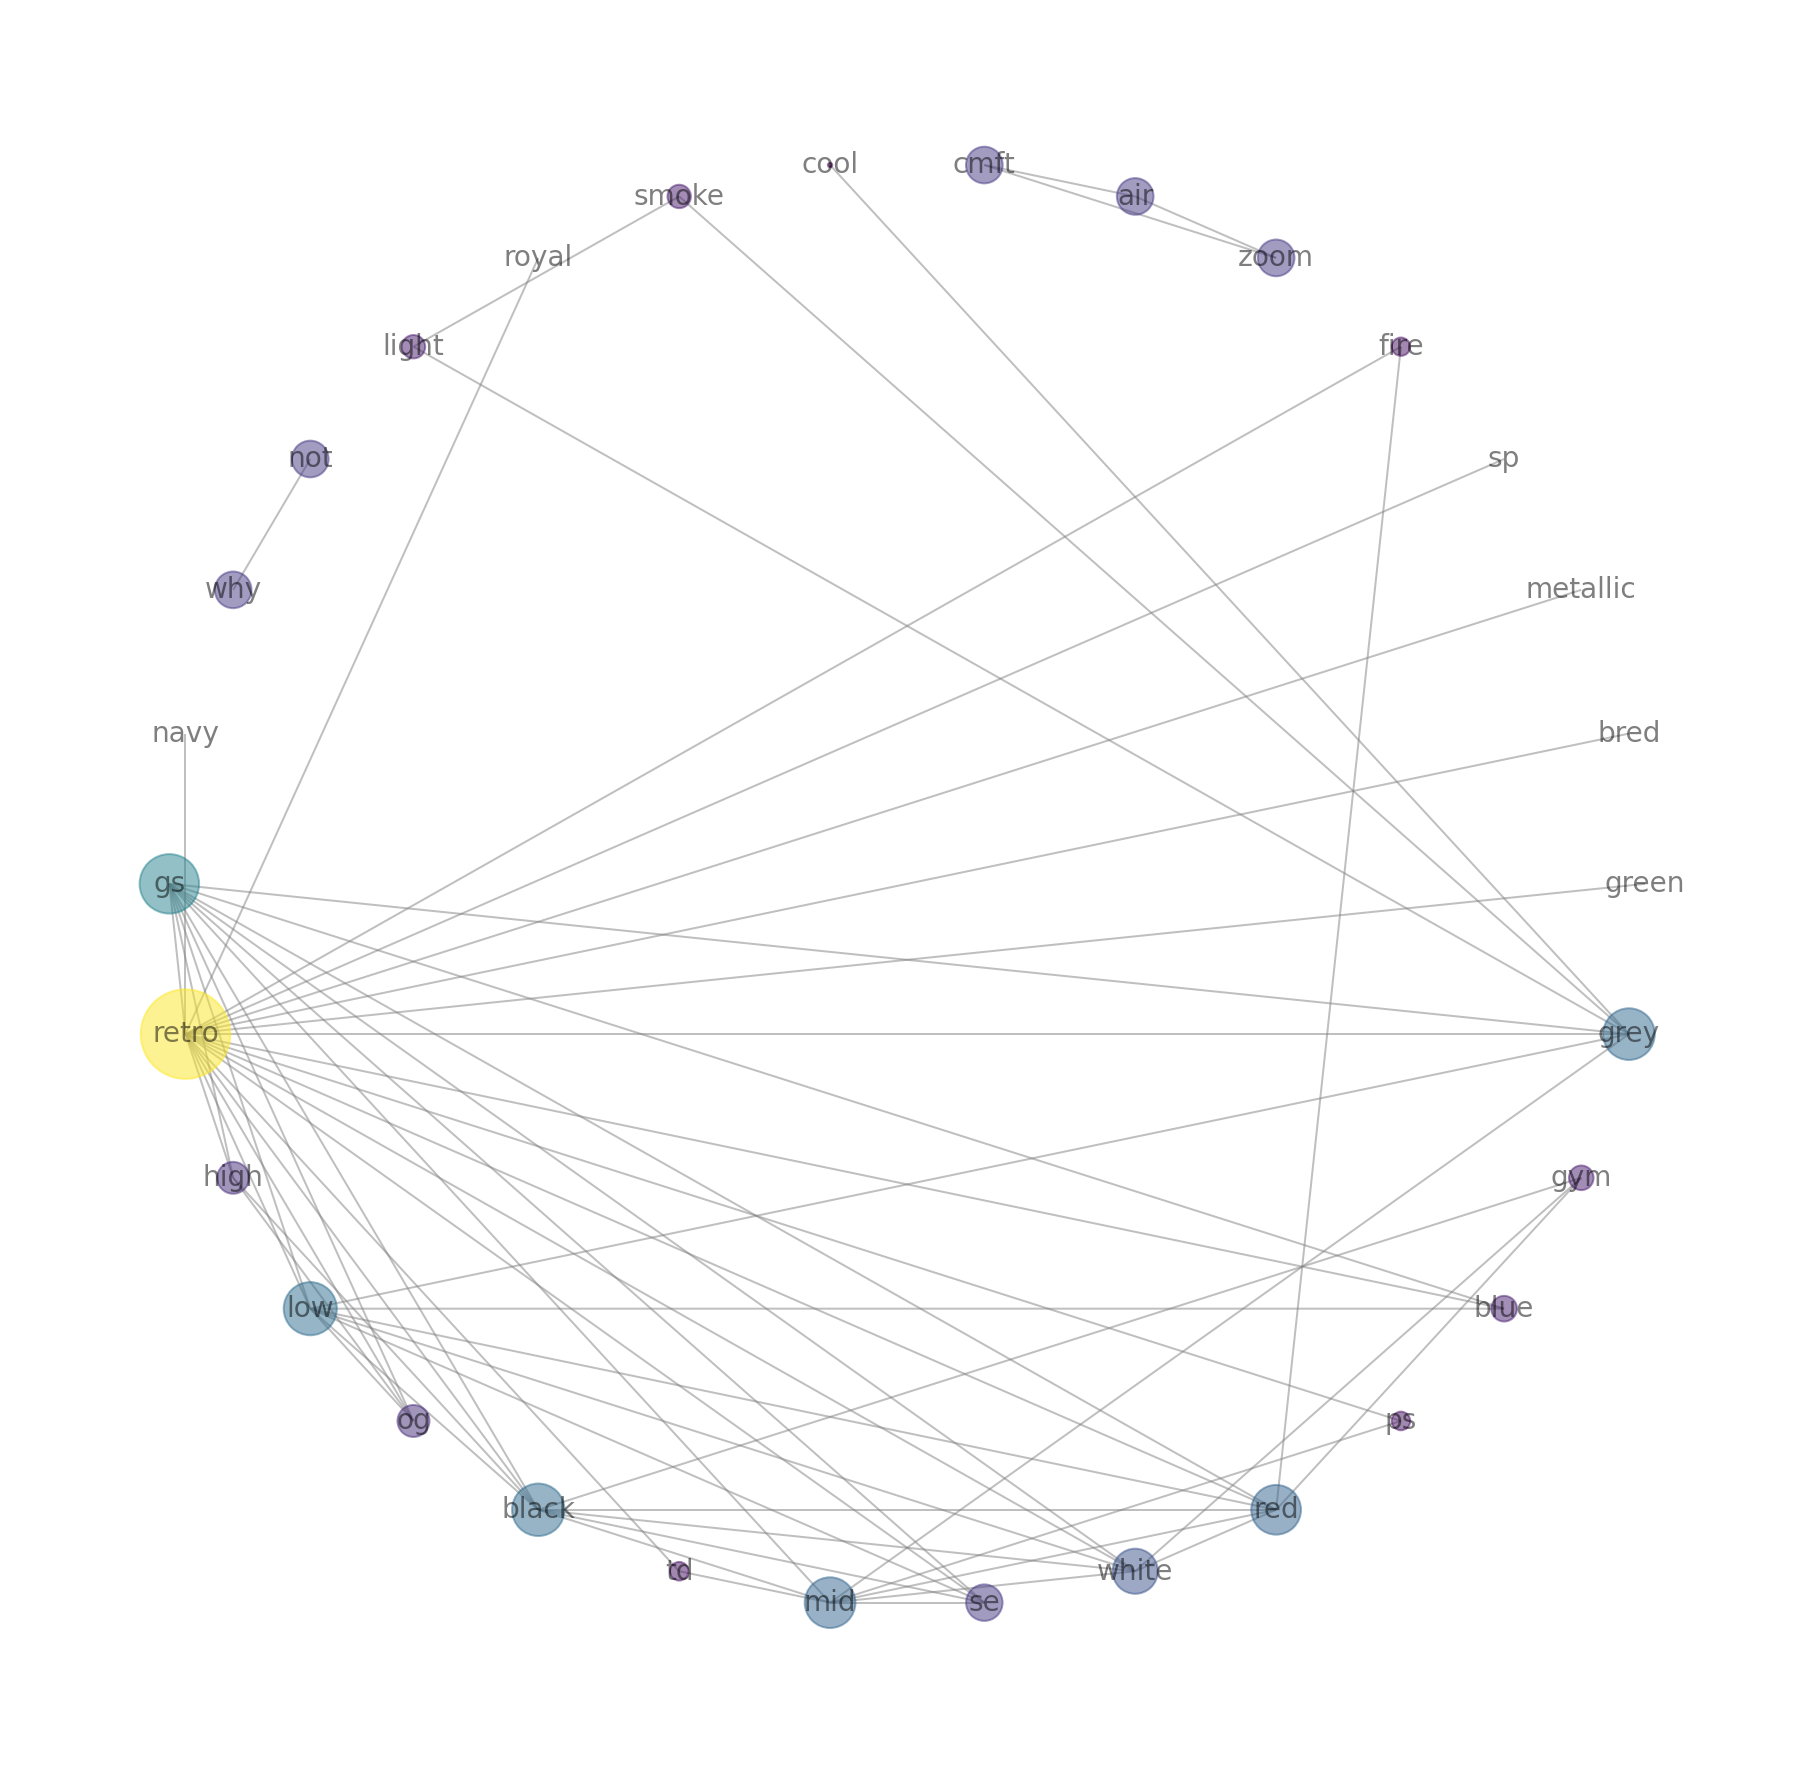

In [ ]:
print("Jorden")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


NewBalance

-----------------------------------



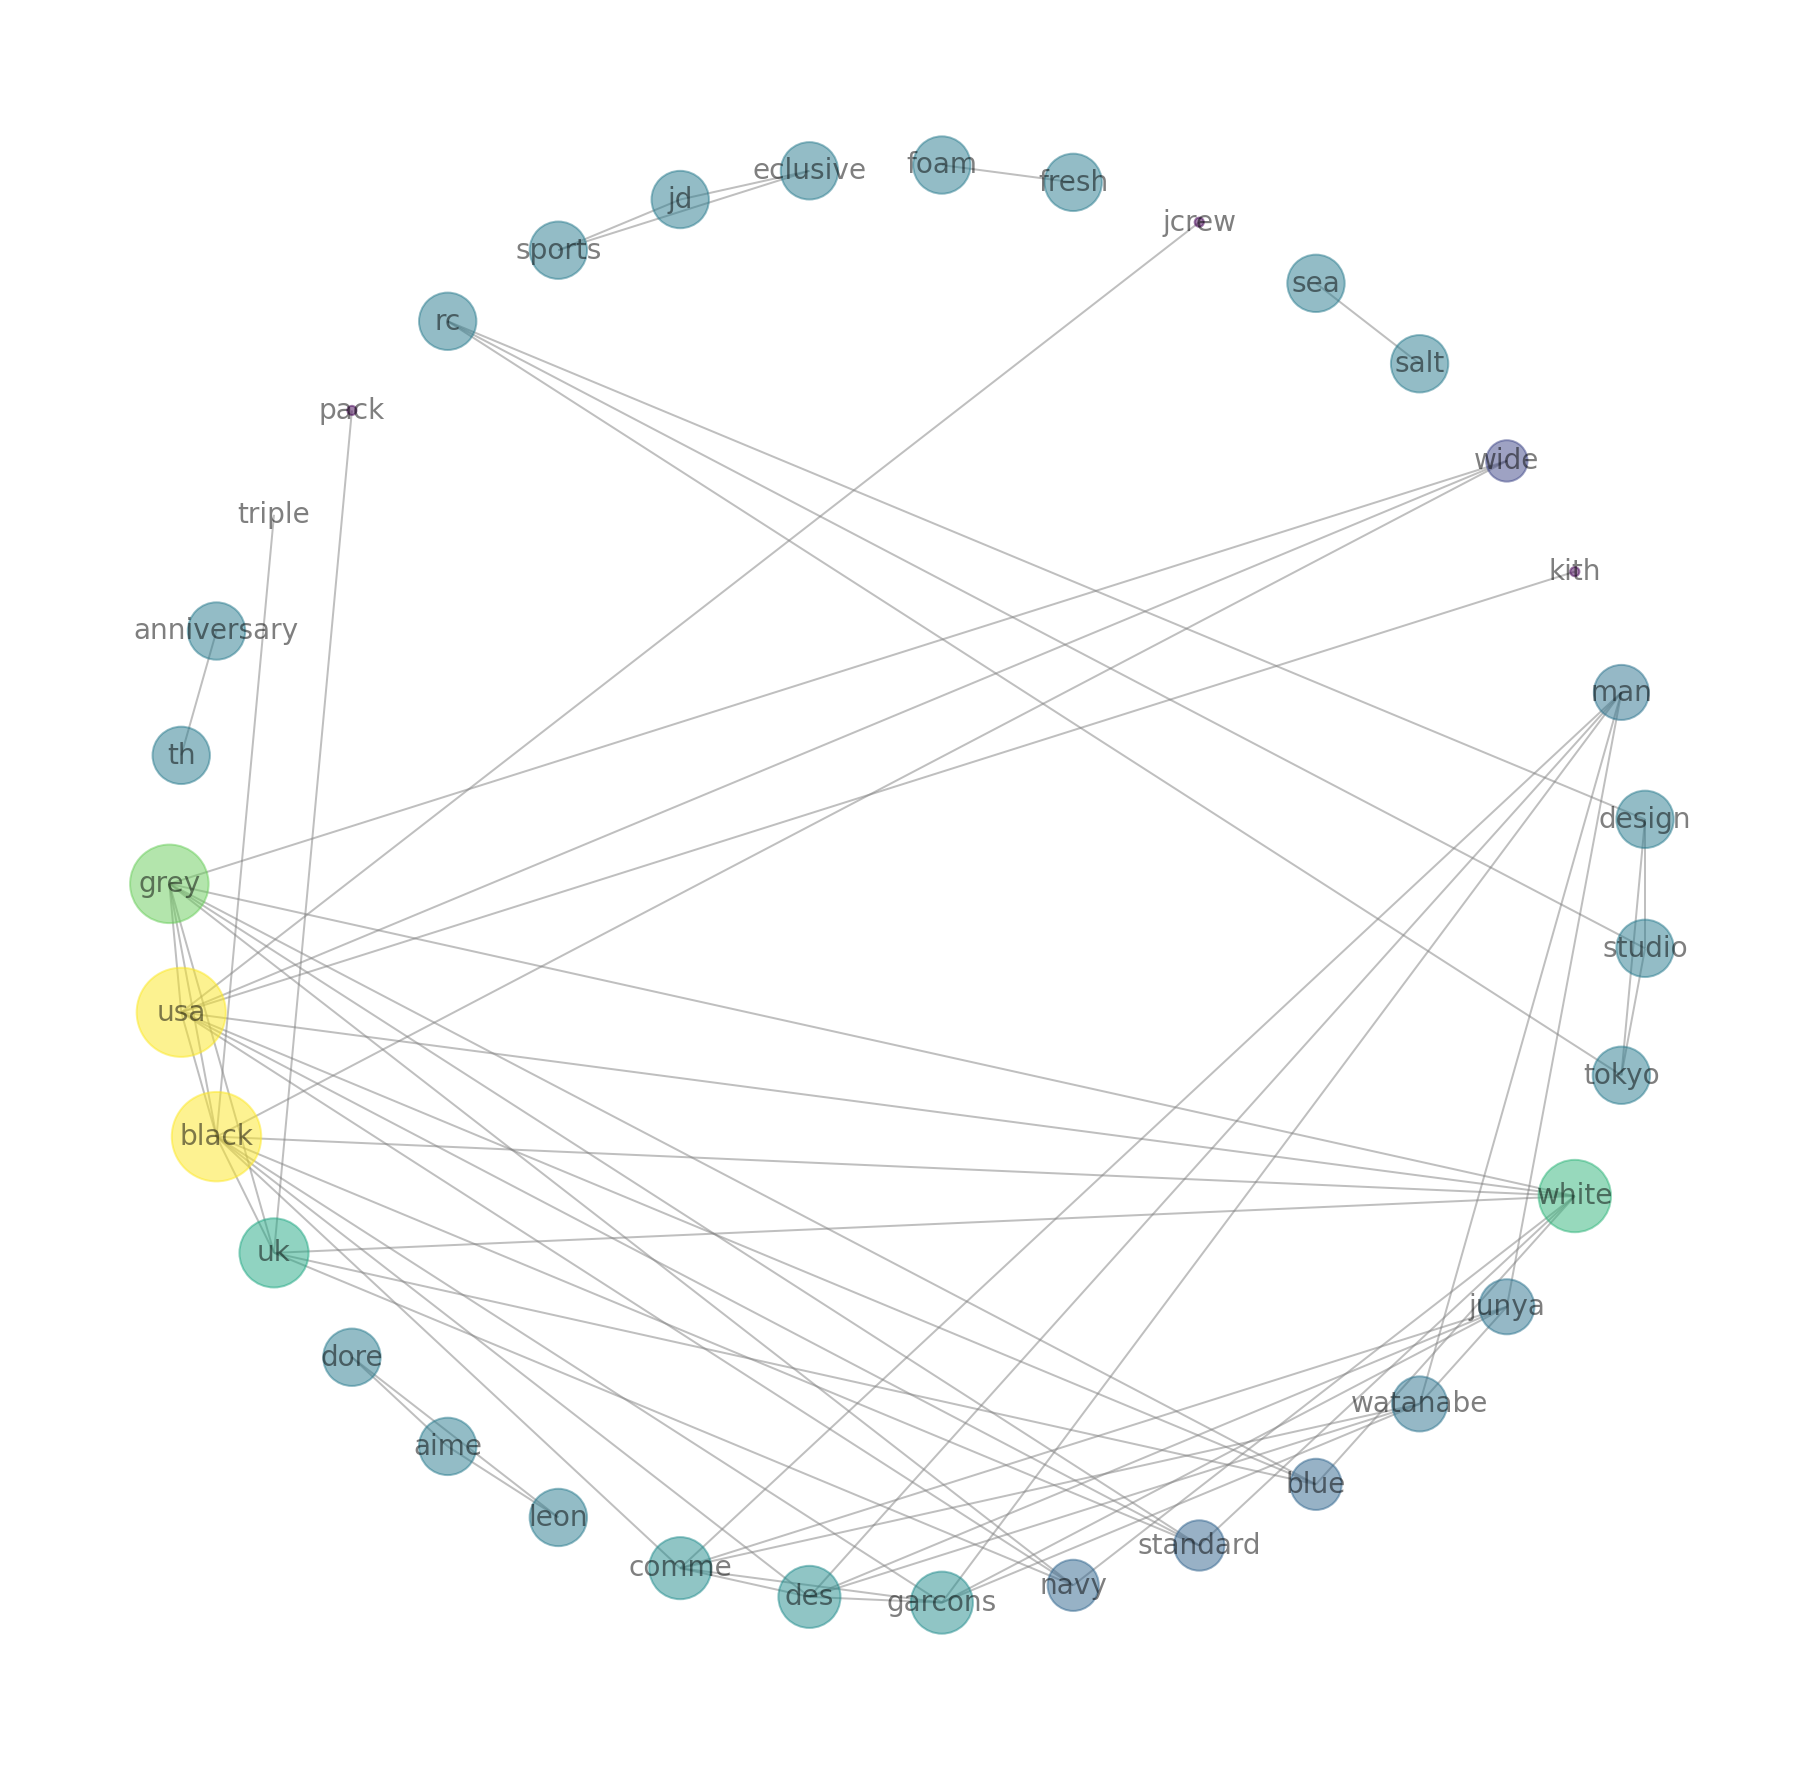

In [ ]:
# NewBalance
tokenizer = TreebankWordTokenizer()

def tokenize_text_NB(text):
    result=[]
    text = re.sub(r'[0-9]+','', text)
    text=text.replace('(','')
    text=text.replace(')','')
    text=text.replace('?','')
    text=text.replace('_','')
    text=text.lower()
    text=text.replace('in','')
    text=text.replace('made','')
    text=tokenizer.tokenize(text)
    for noun in text :
      
      if len(noun)>1:
        result.append(noun)
    return result

data2_index=(data['브랜드']==Top10_brand[1])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[1],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text_NB(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("NewBalance")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Nike

-----------------------------------



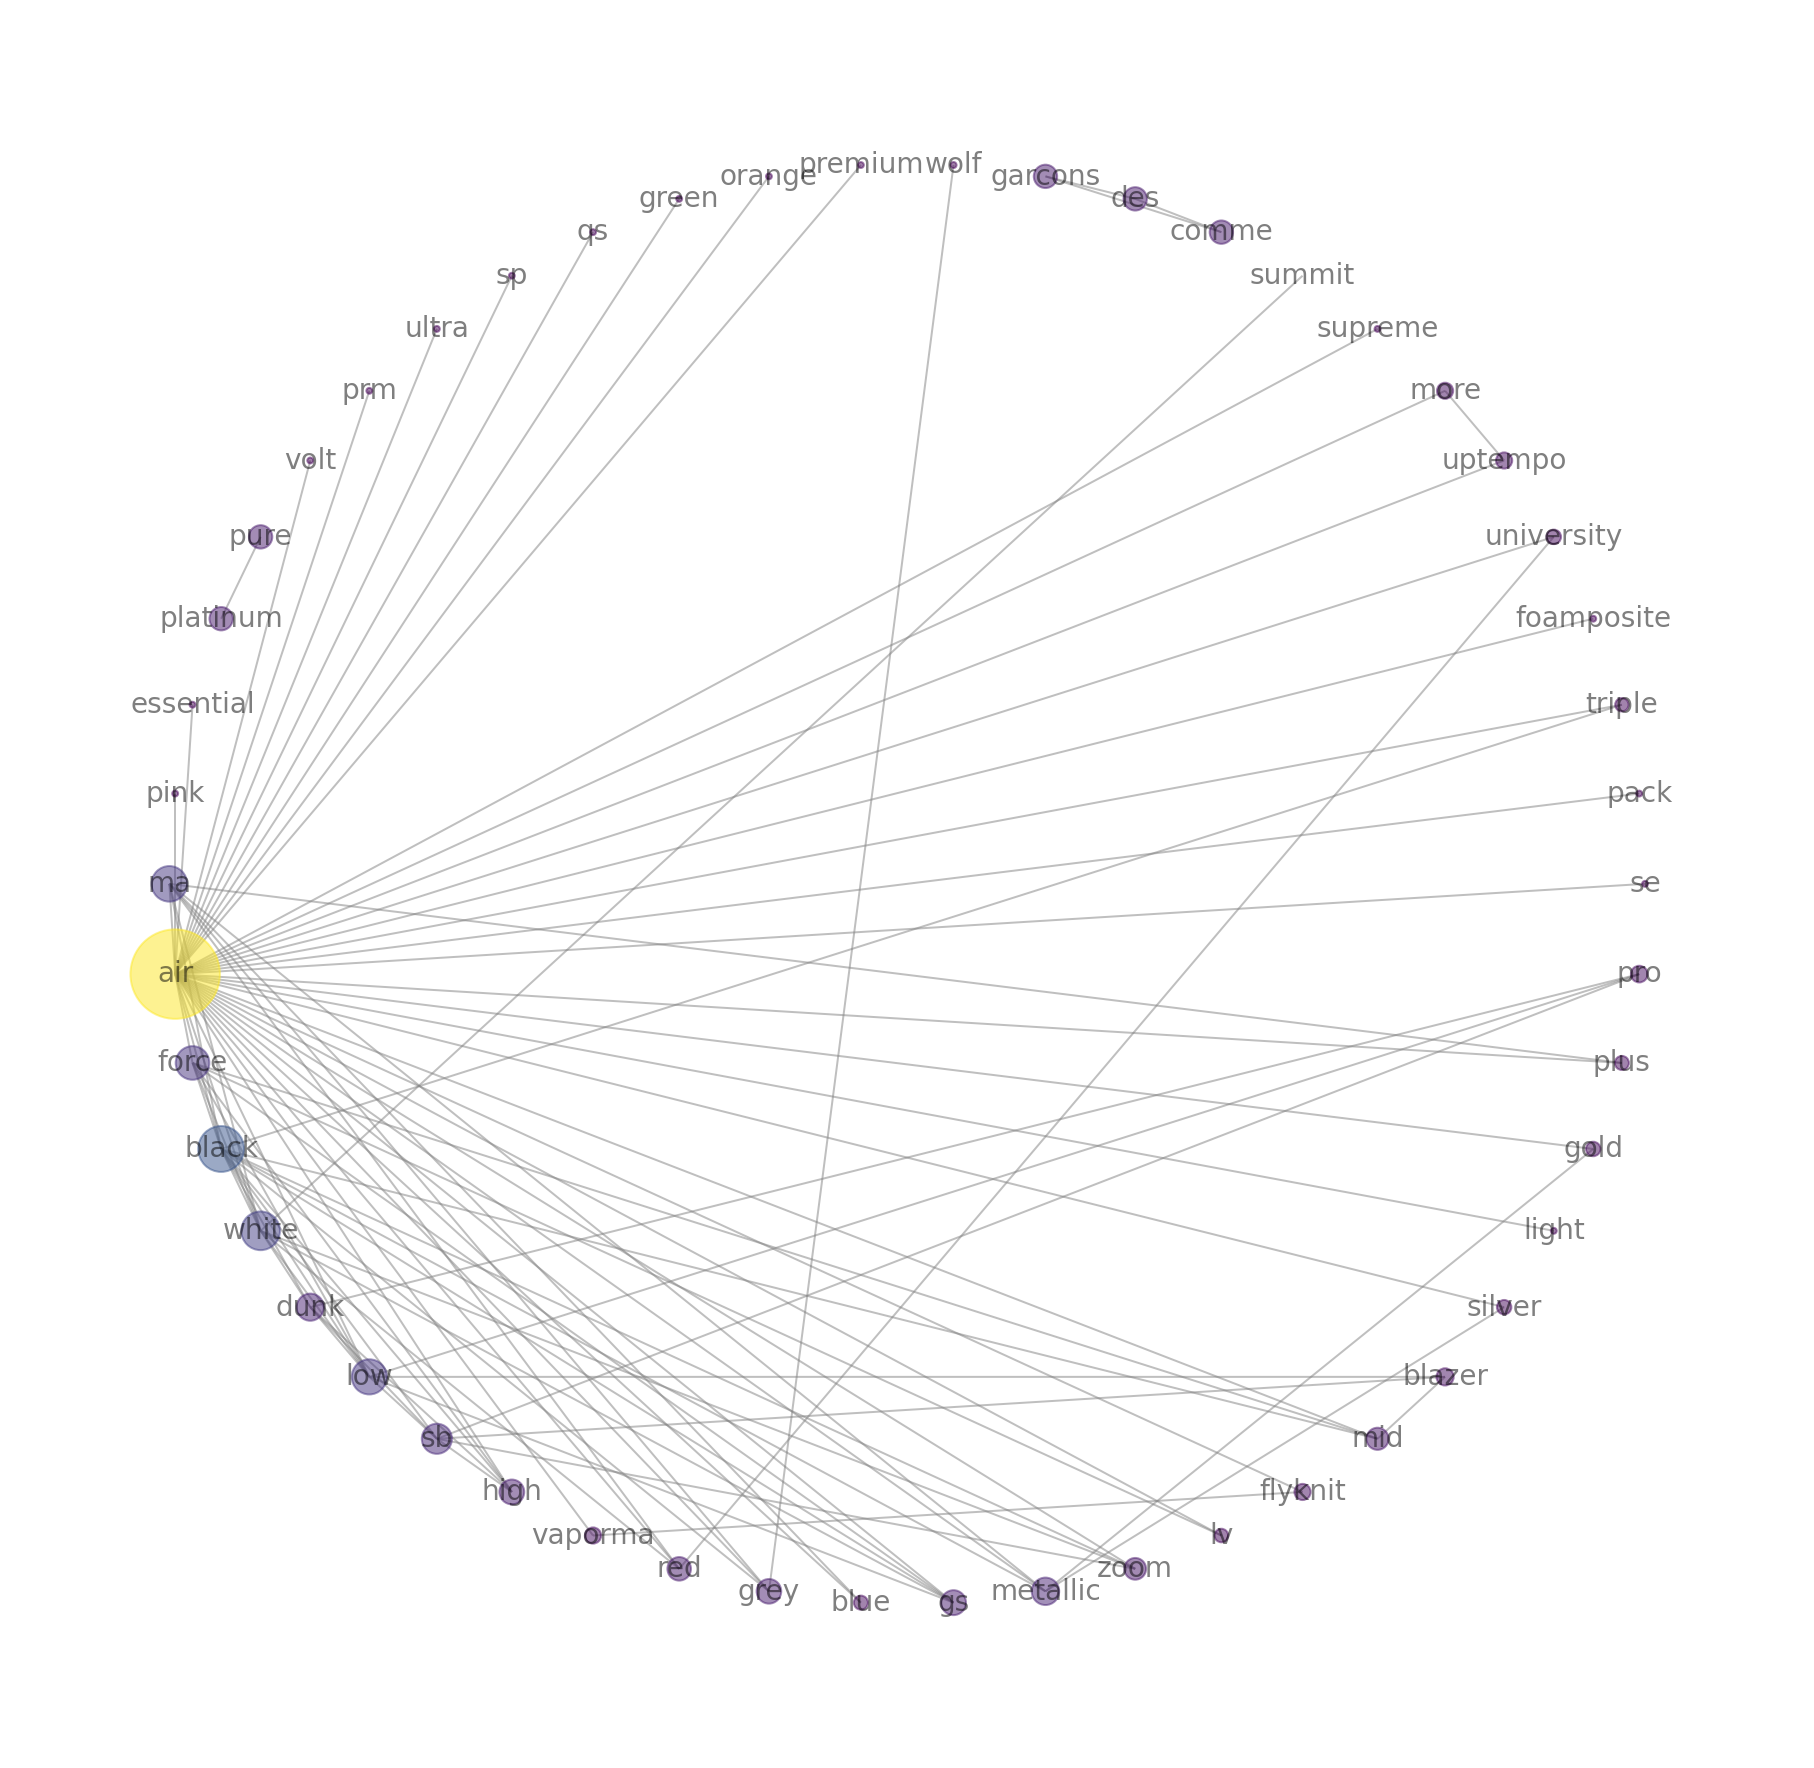

In [ ]:
# Nike
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[2])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[2],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Nike")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Converse

-----------------------------------



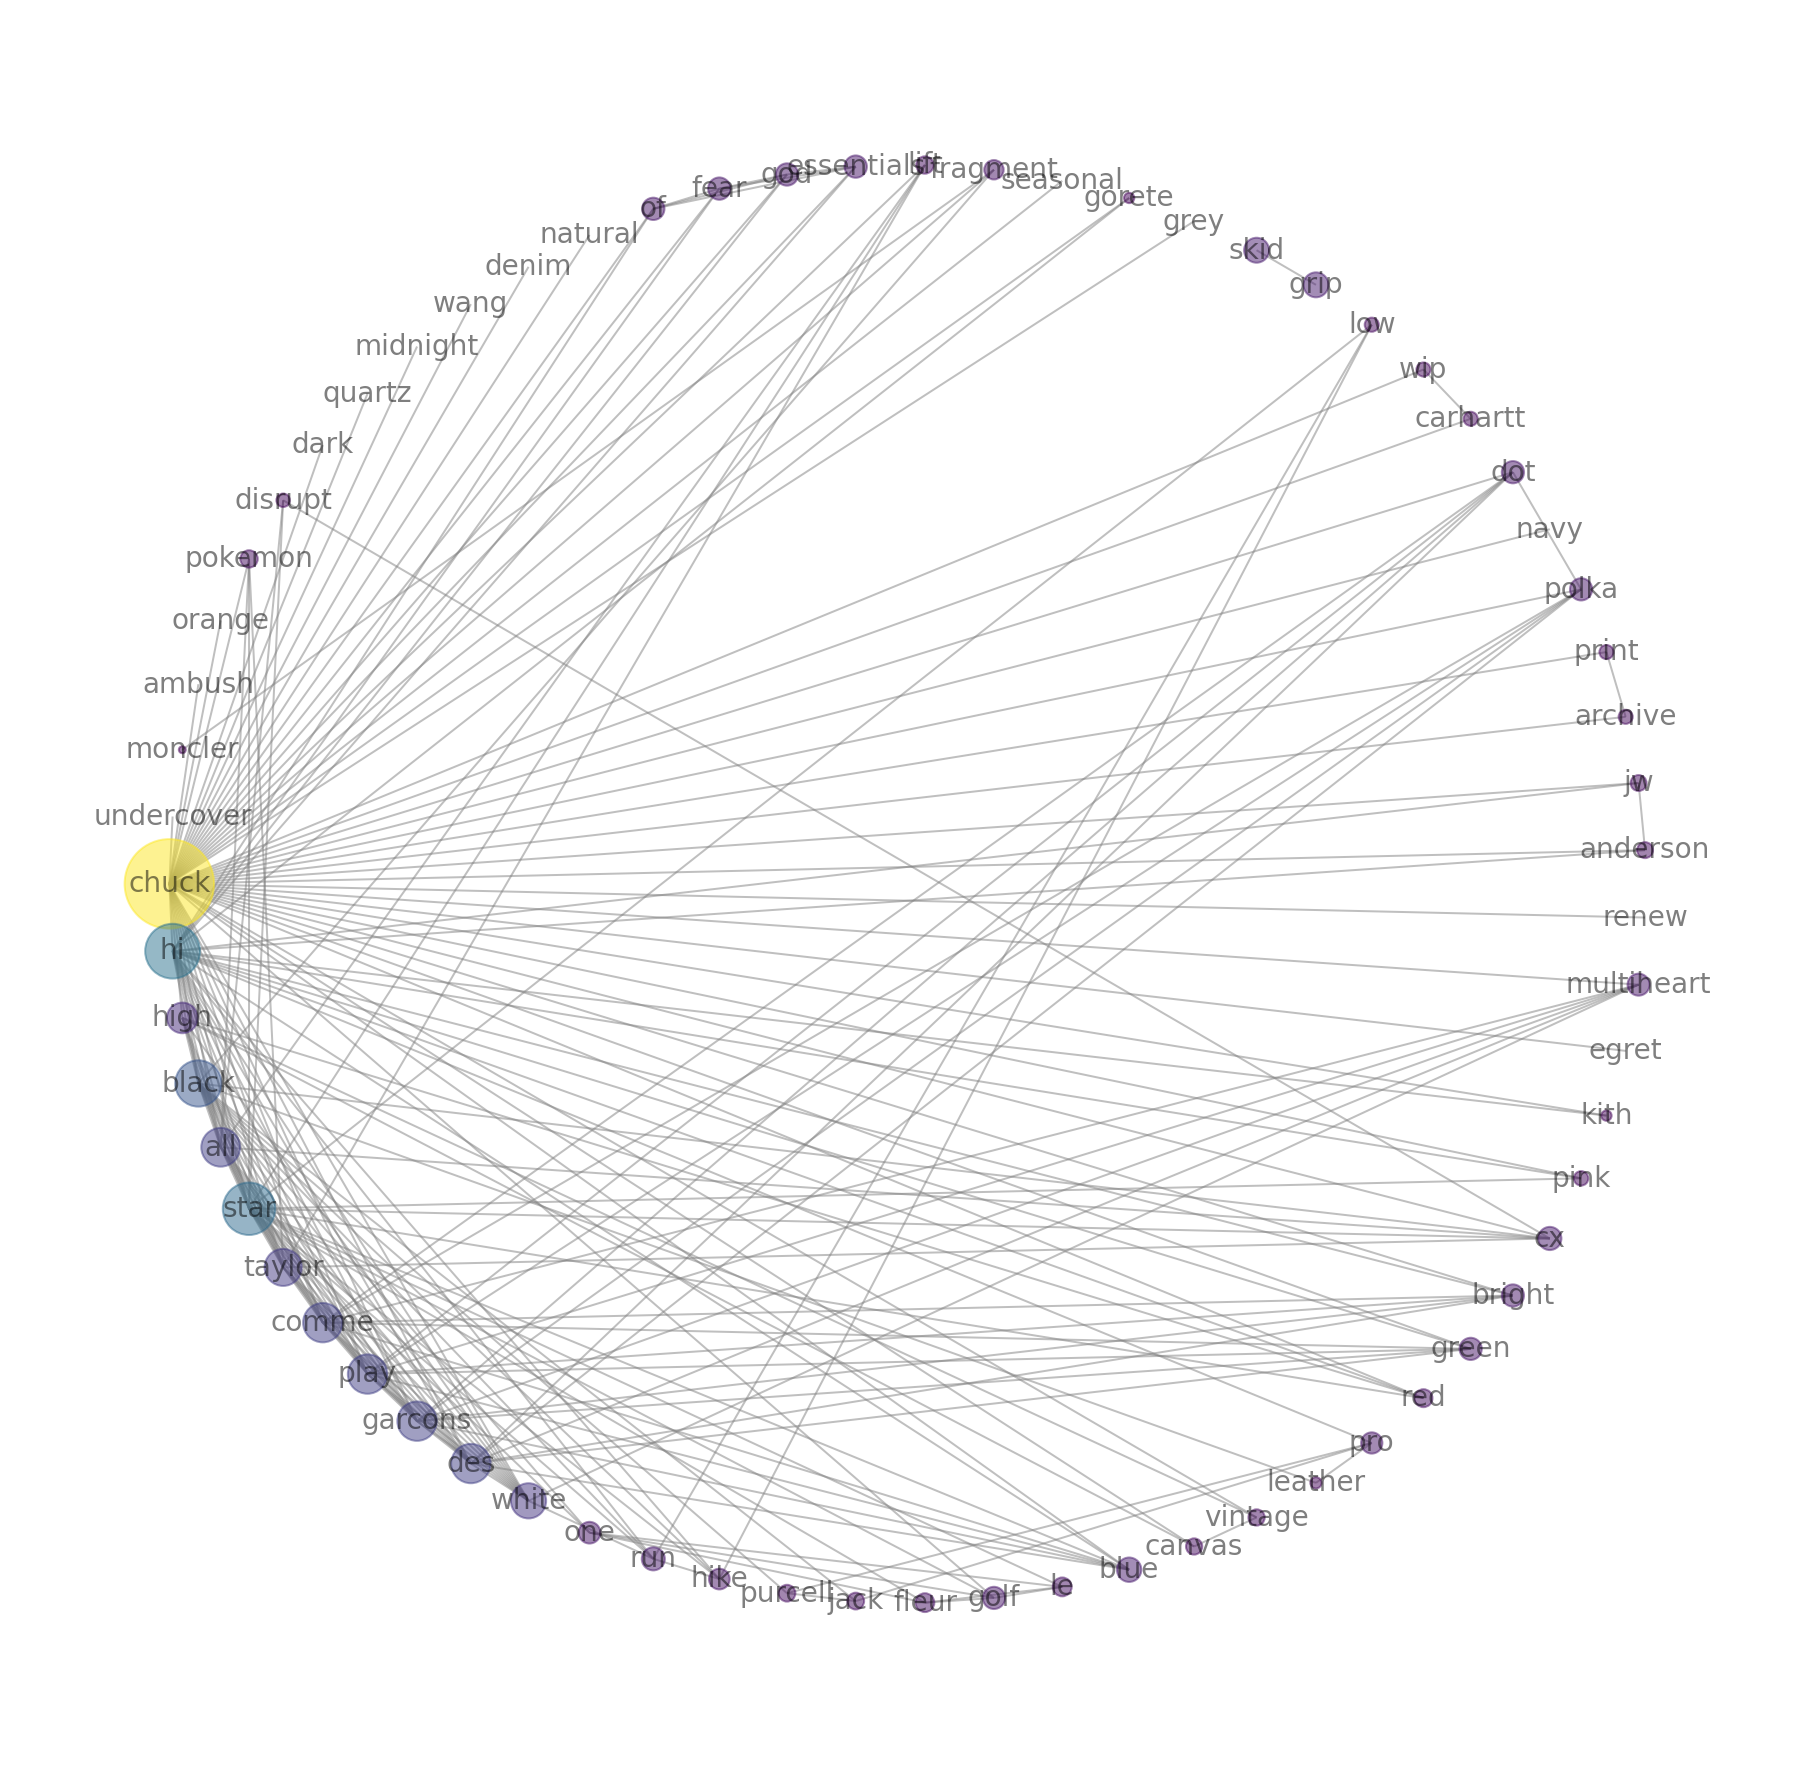

In [ ]:
# Converse
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[3])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[3],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Converse")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Adidas

-----------------------------------



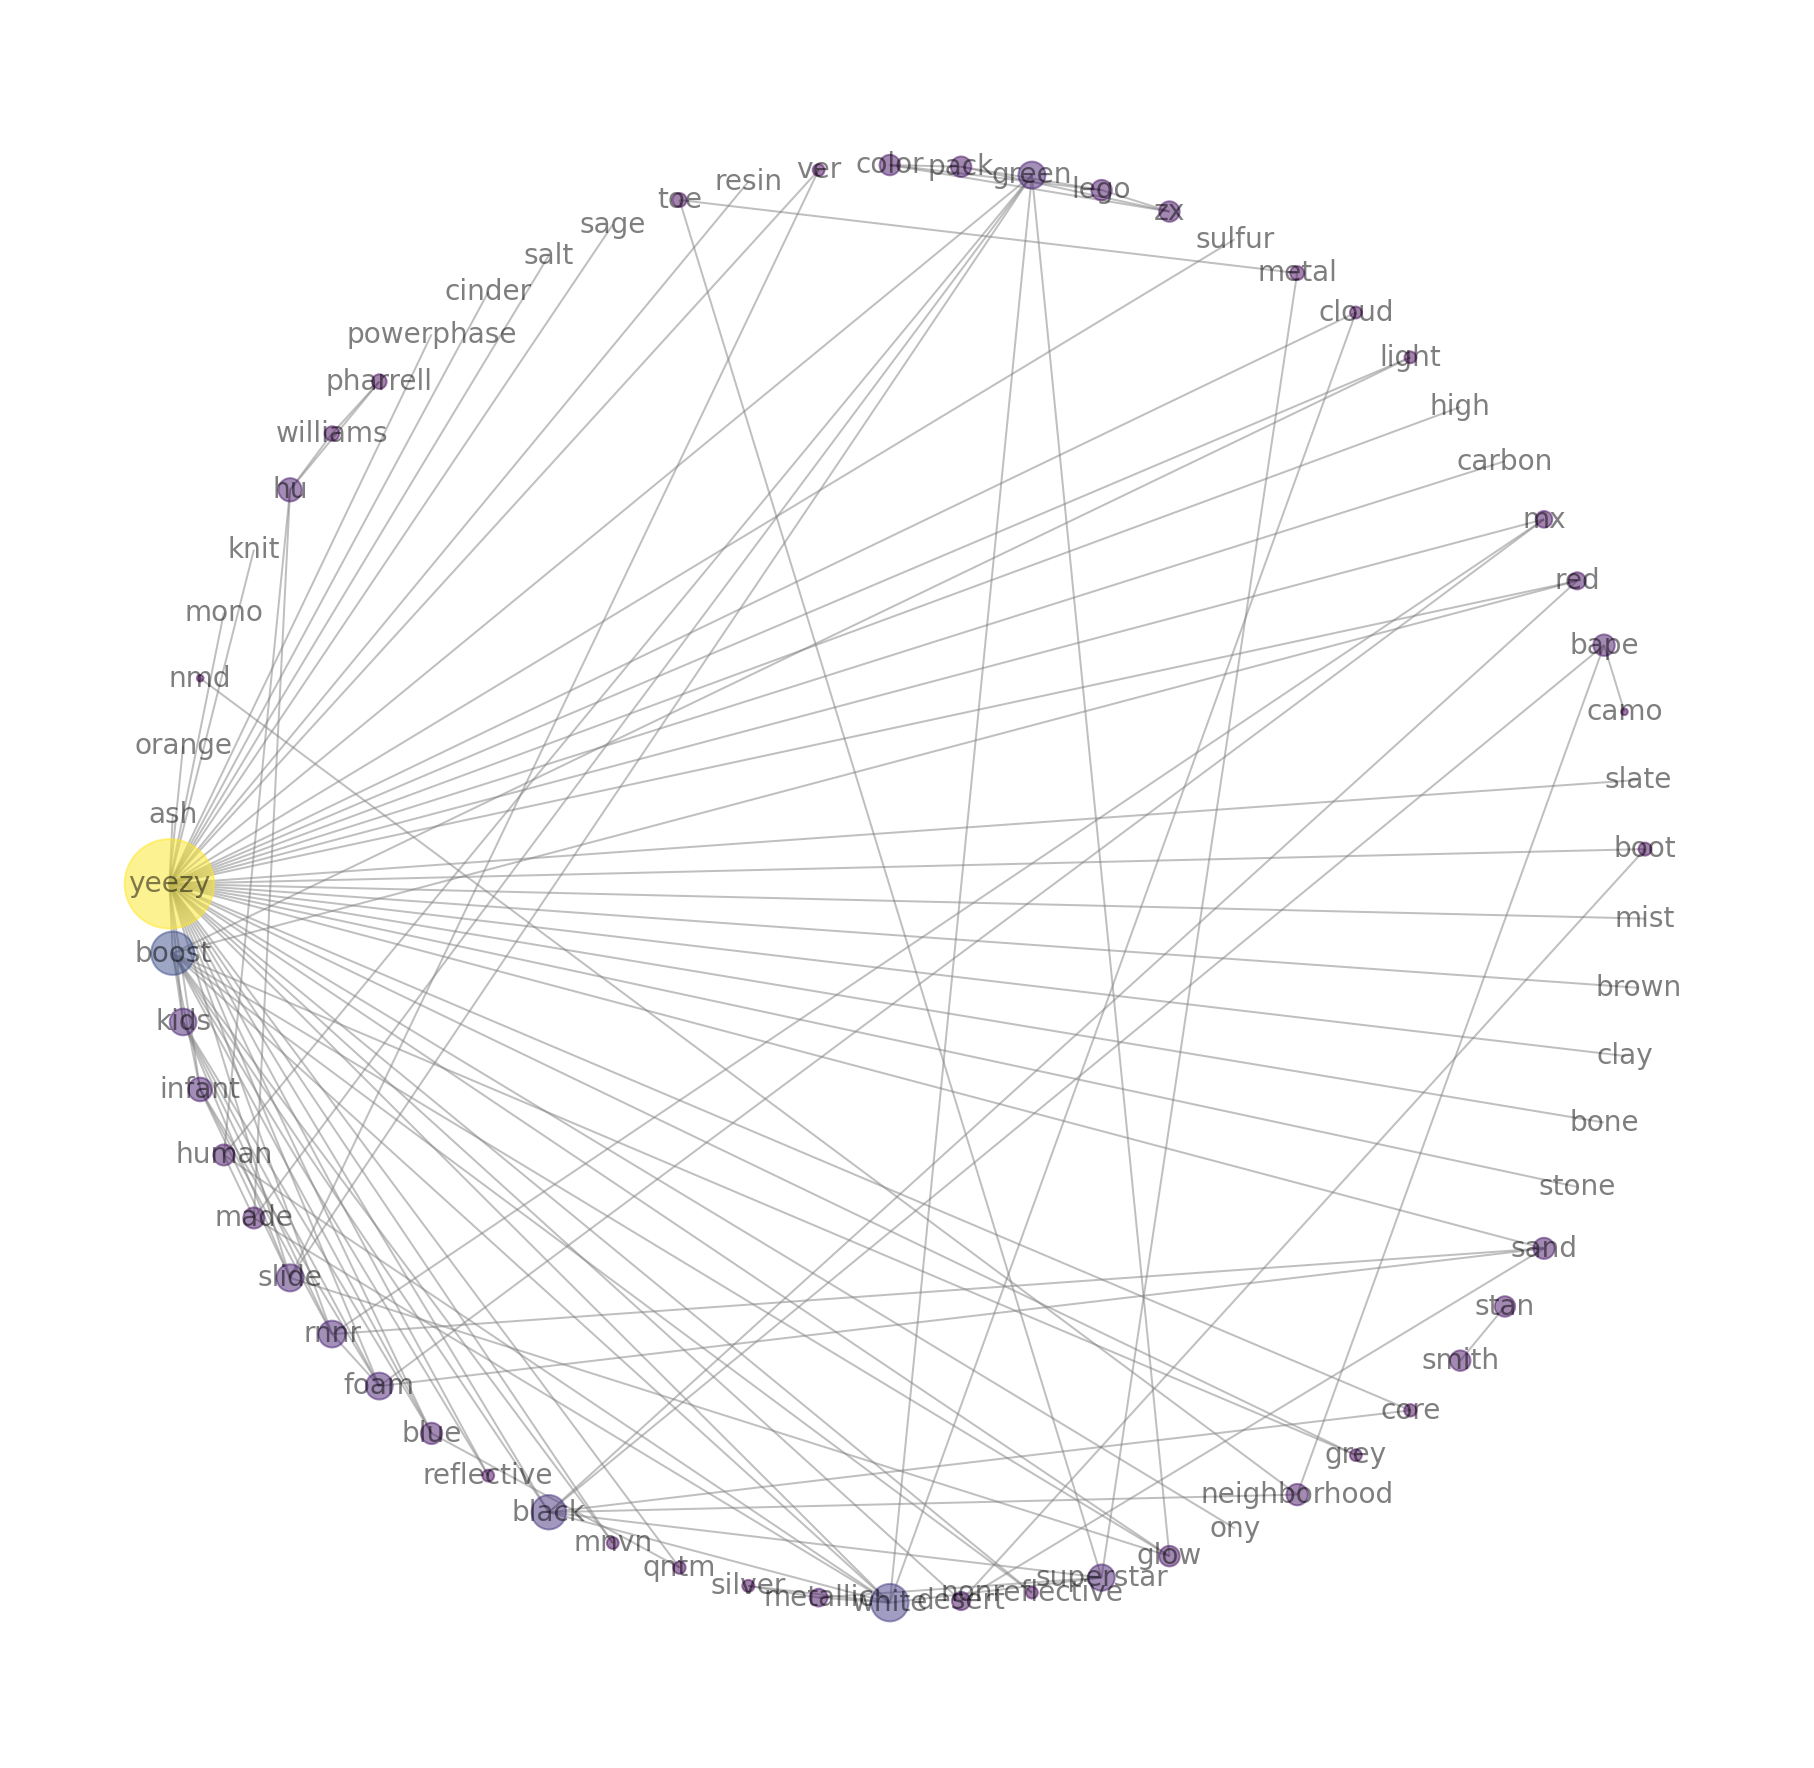

In [ ]:
# Adidas
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[4])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[4],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Adidas")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Camper

-----------------------------------



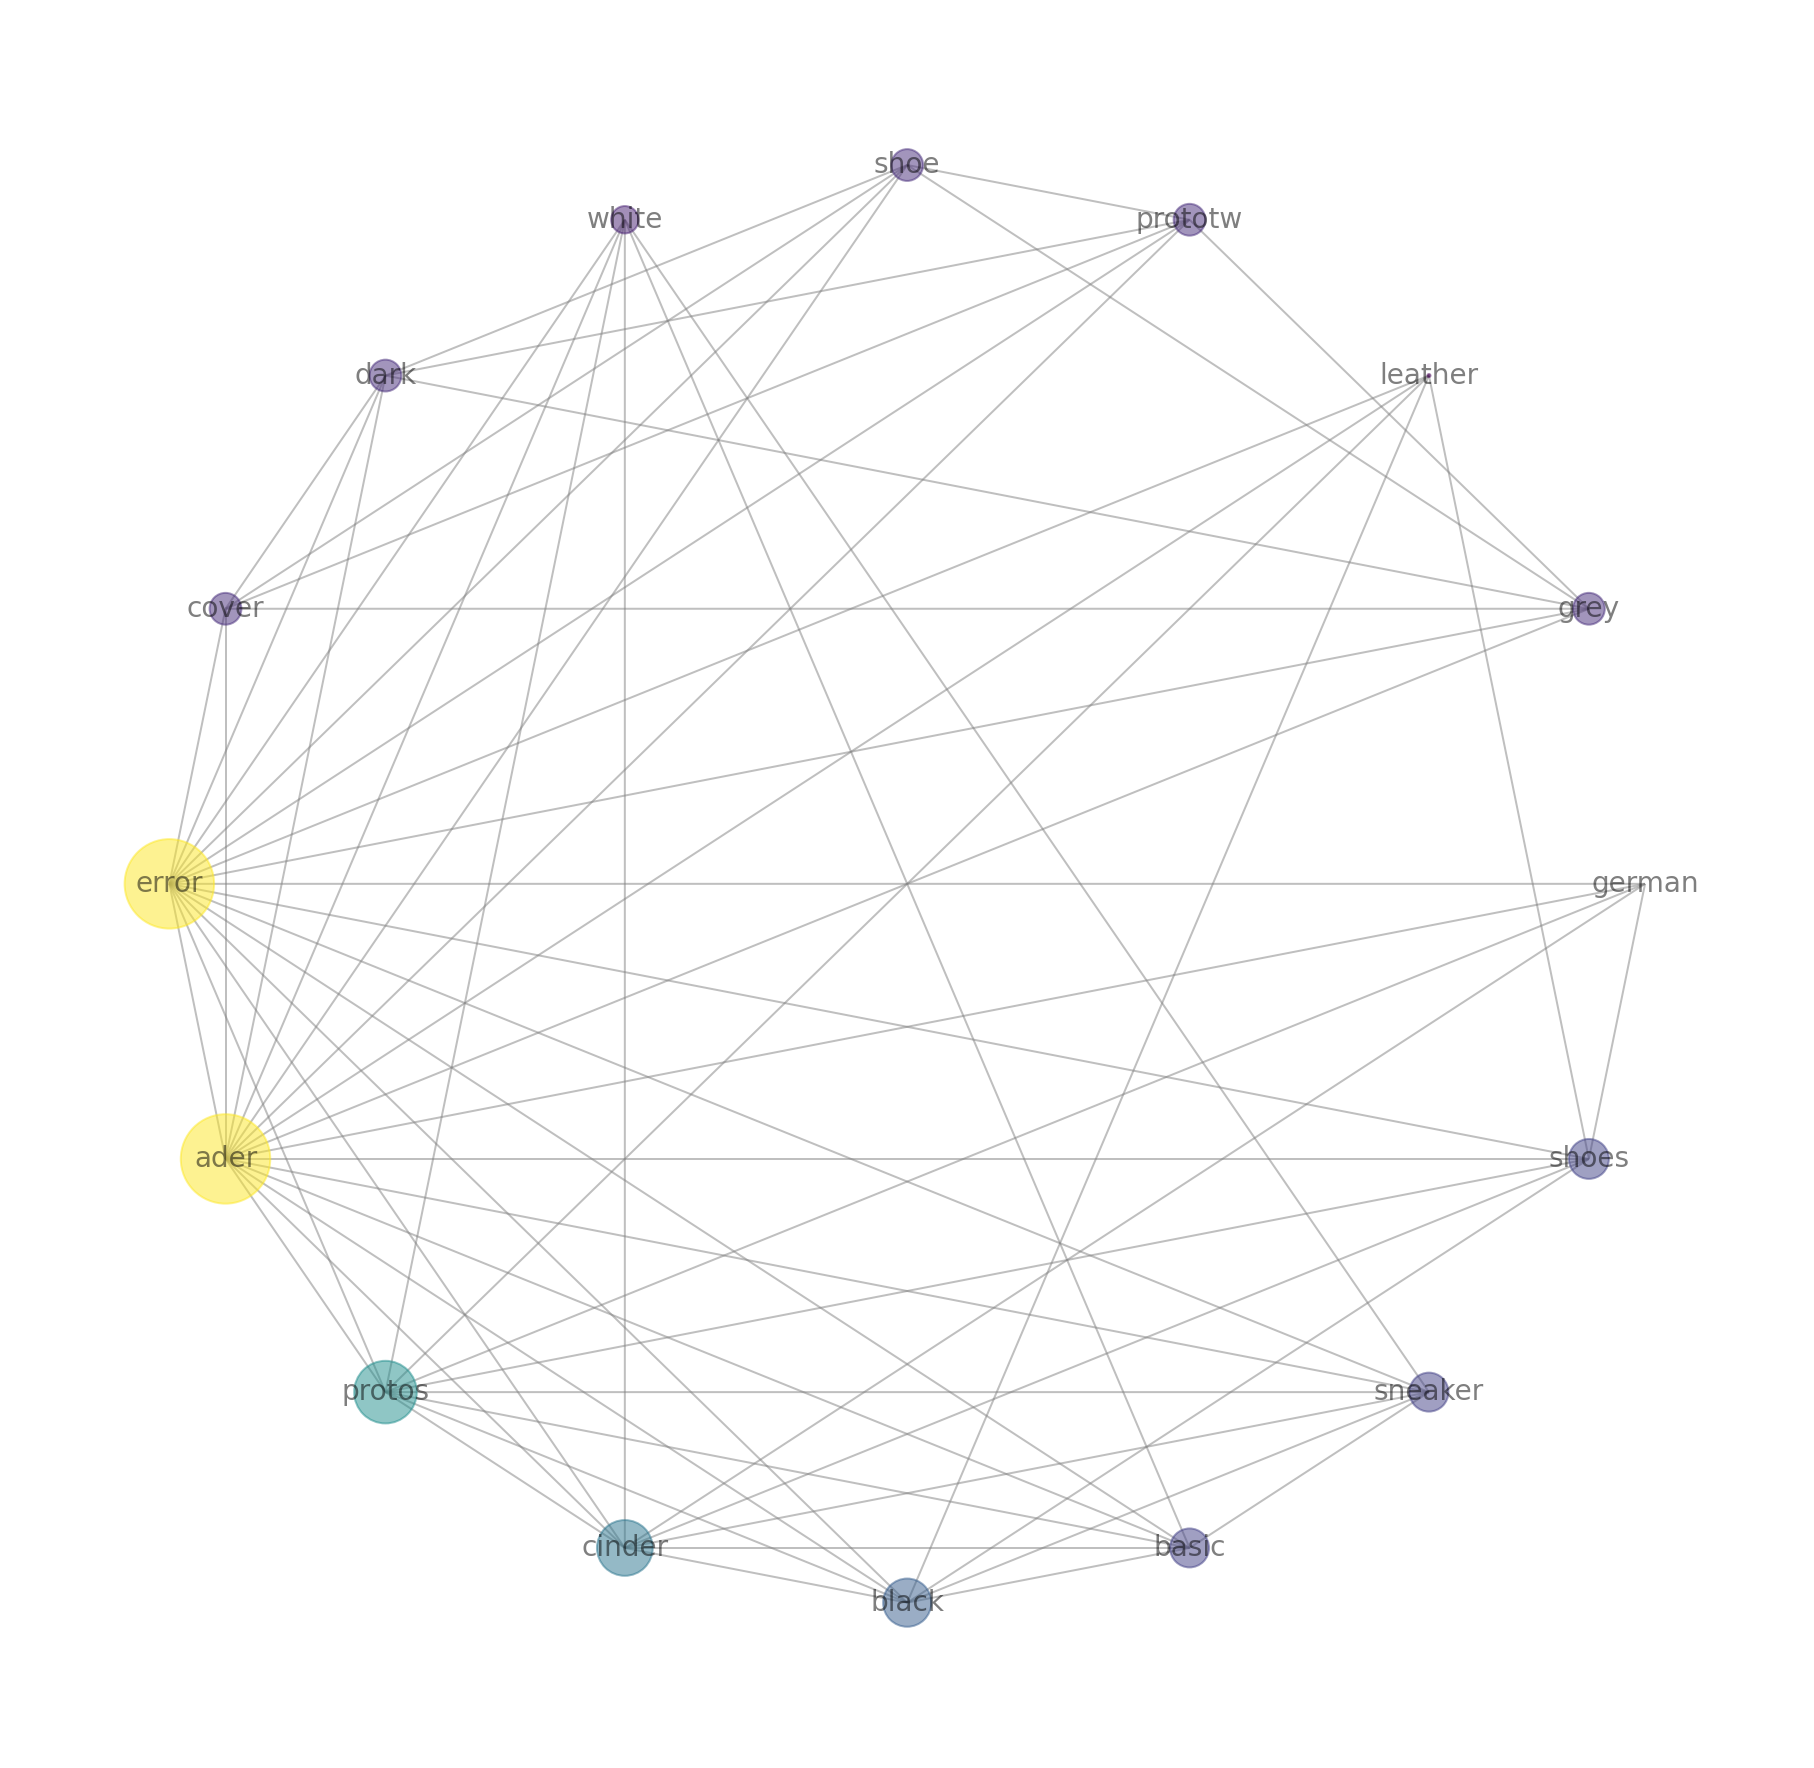

In [ ]:
# Camper
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[5])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[5],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Camper")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Oofos

-----------------------------------



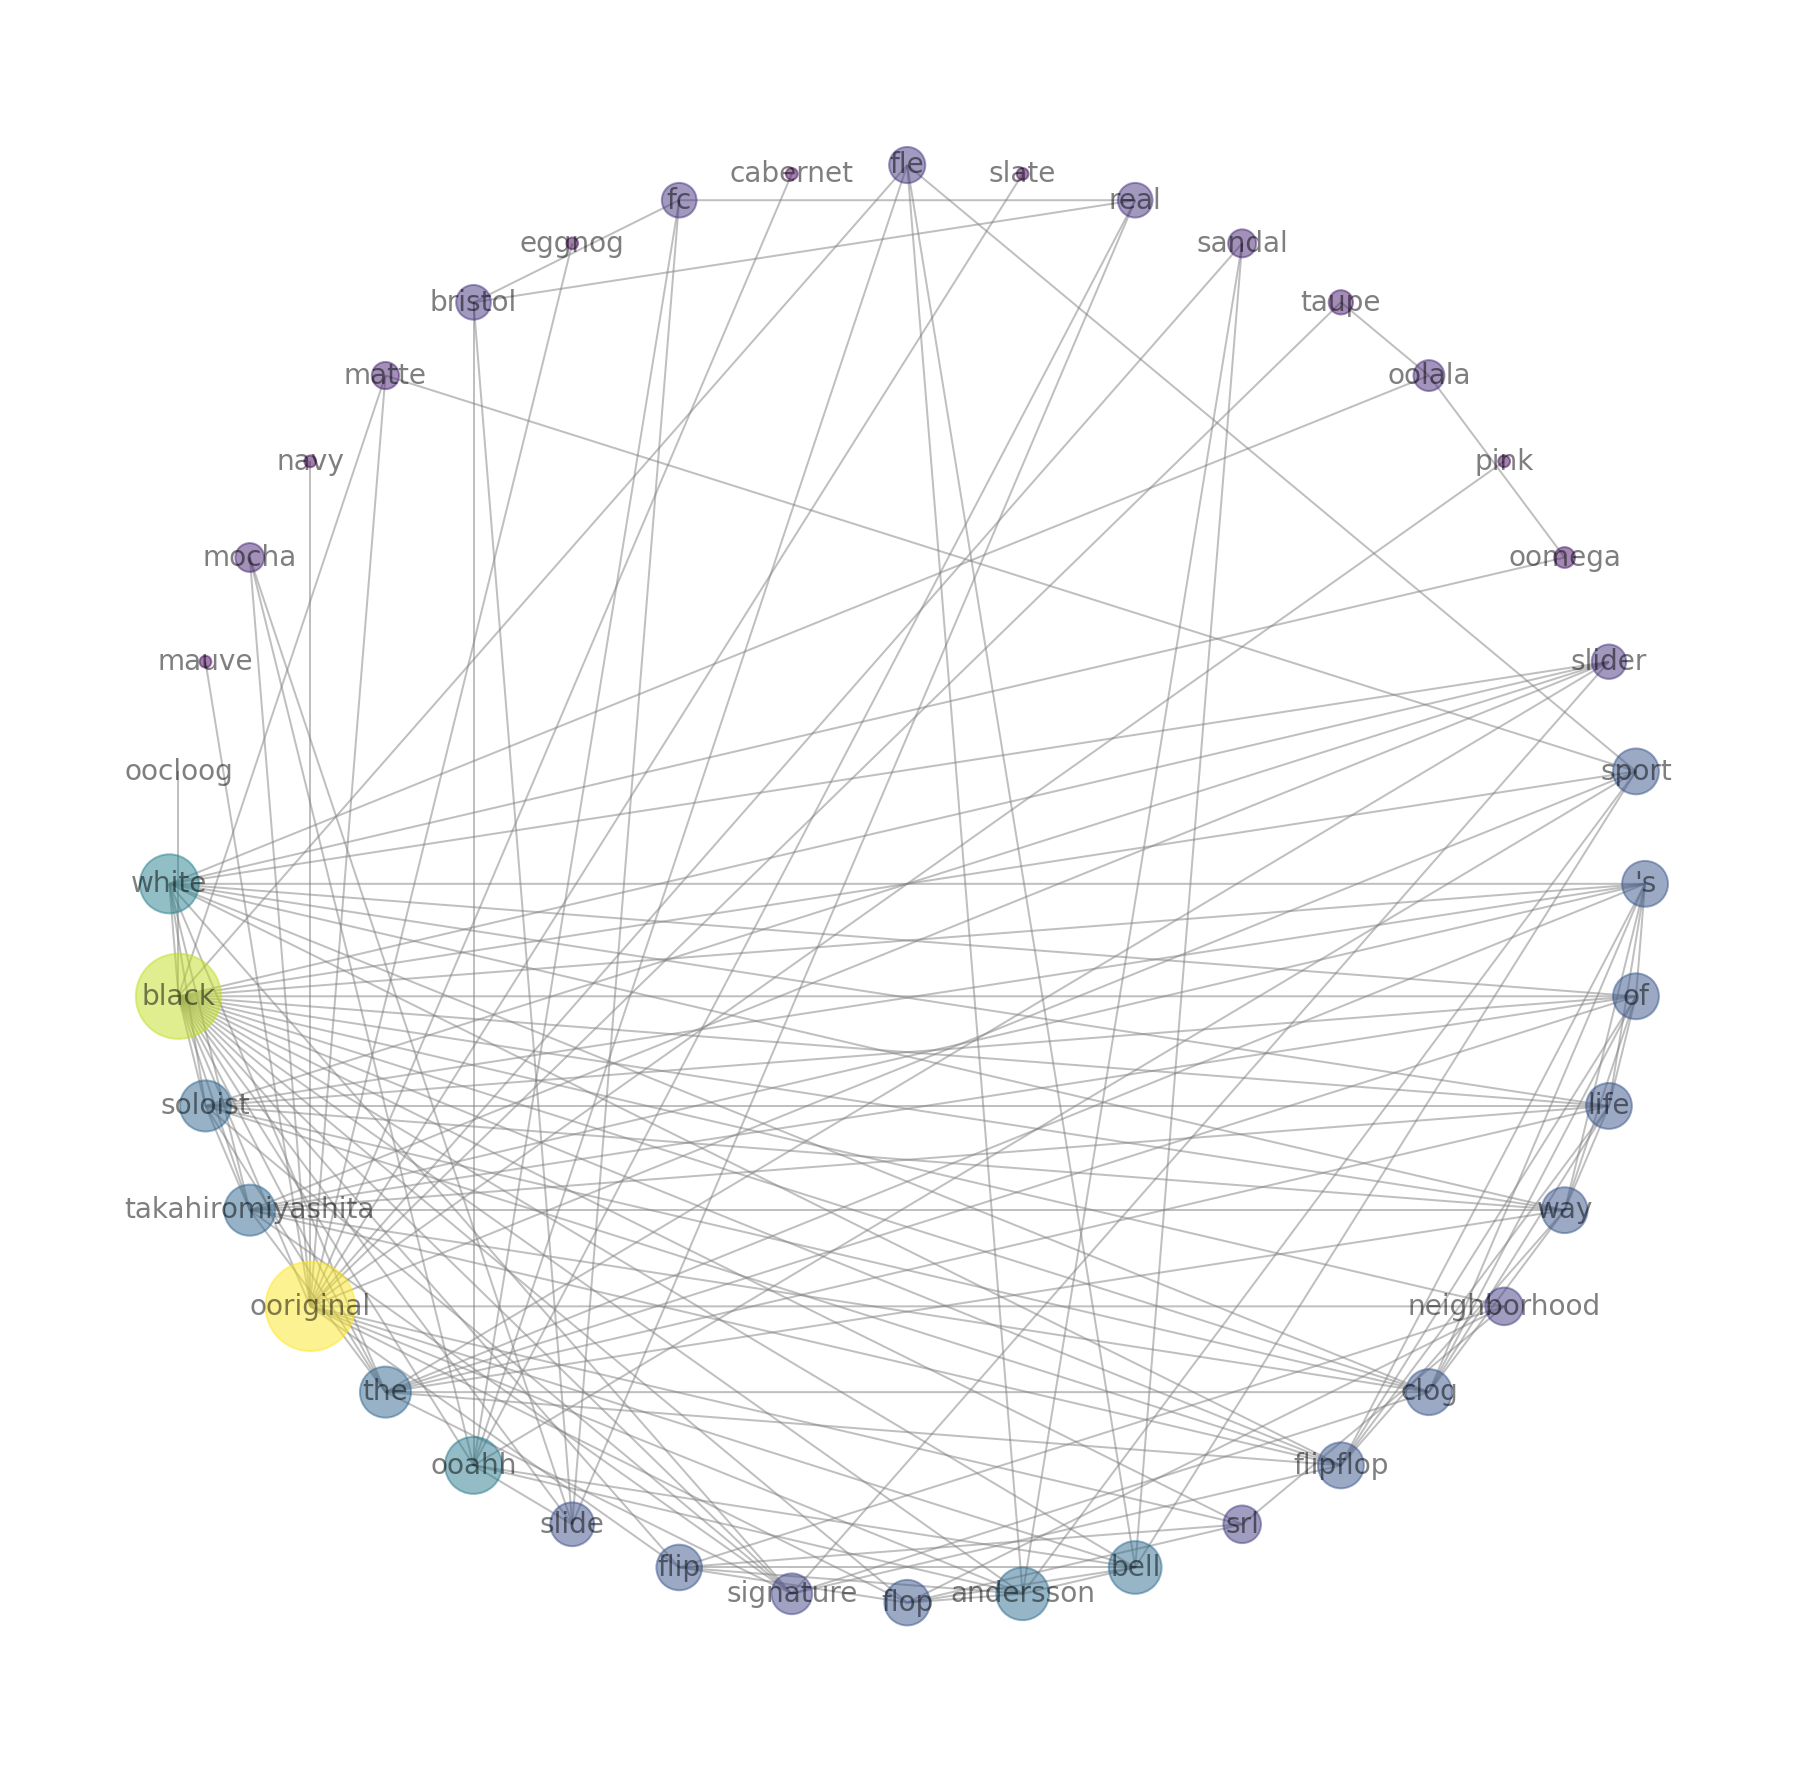

In [ ]:
# Oofos
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[6])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[6],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Oofos")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')


/usr/local/lib/python3.7/dist-packages/networkx/algorithms/link_analysis/pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  G, alpha, personalization, max_iter, tol, nstart, weight, dangling


Autry

-----------------------------------



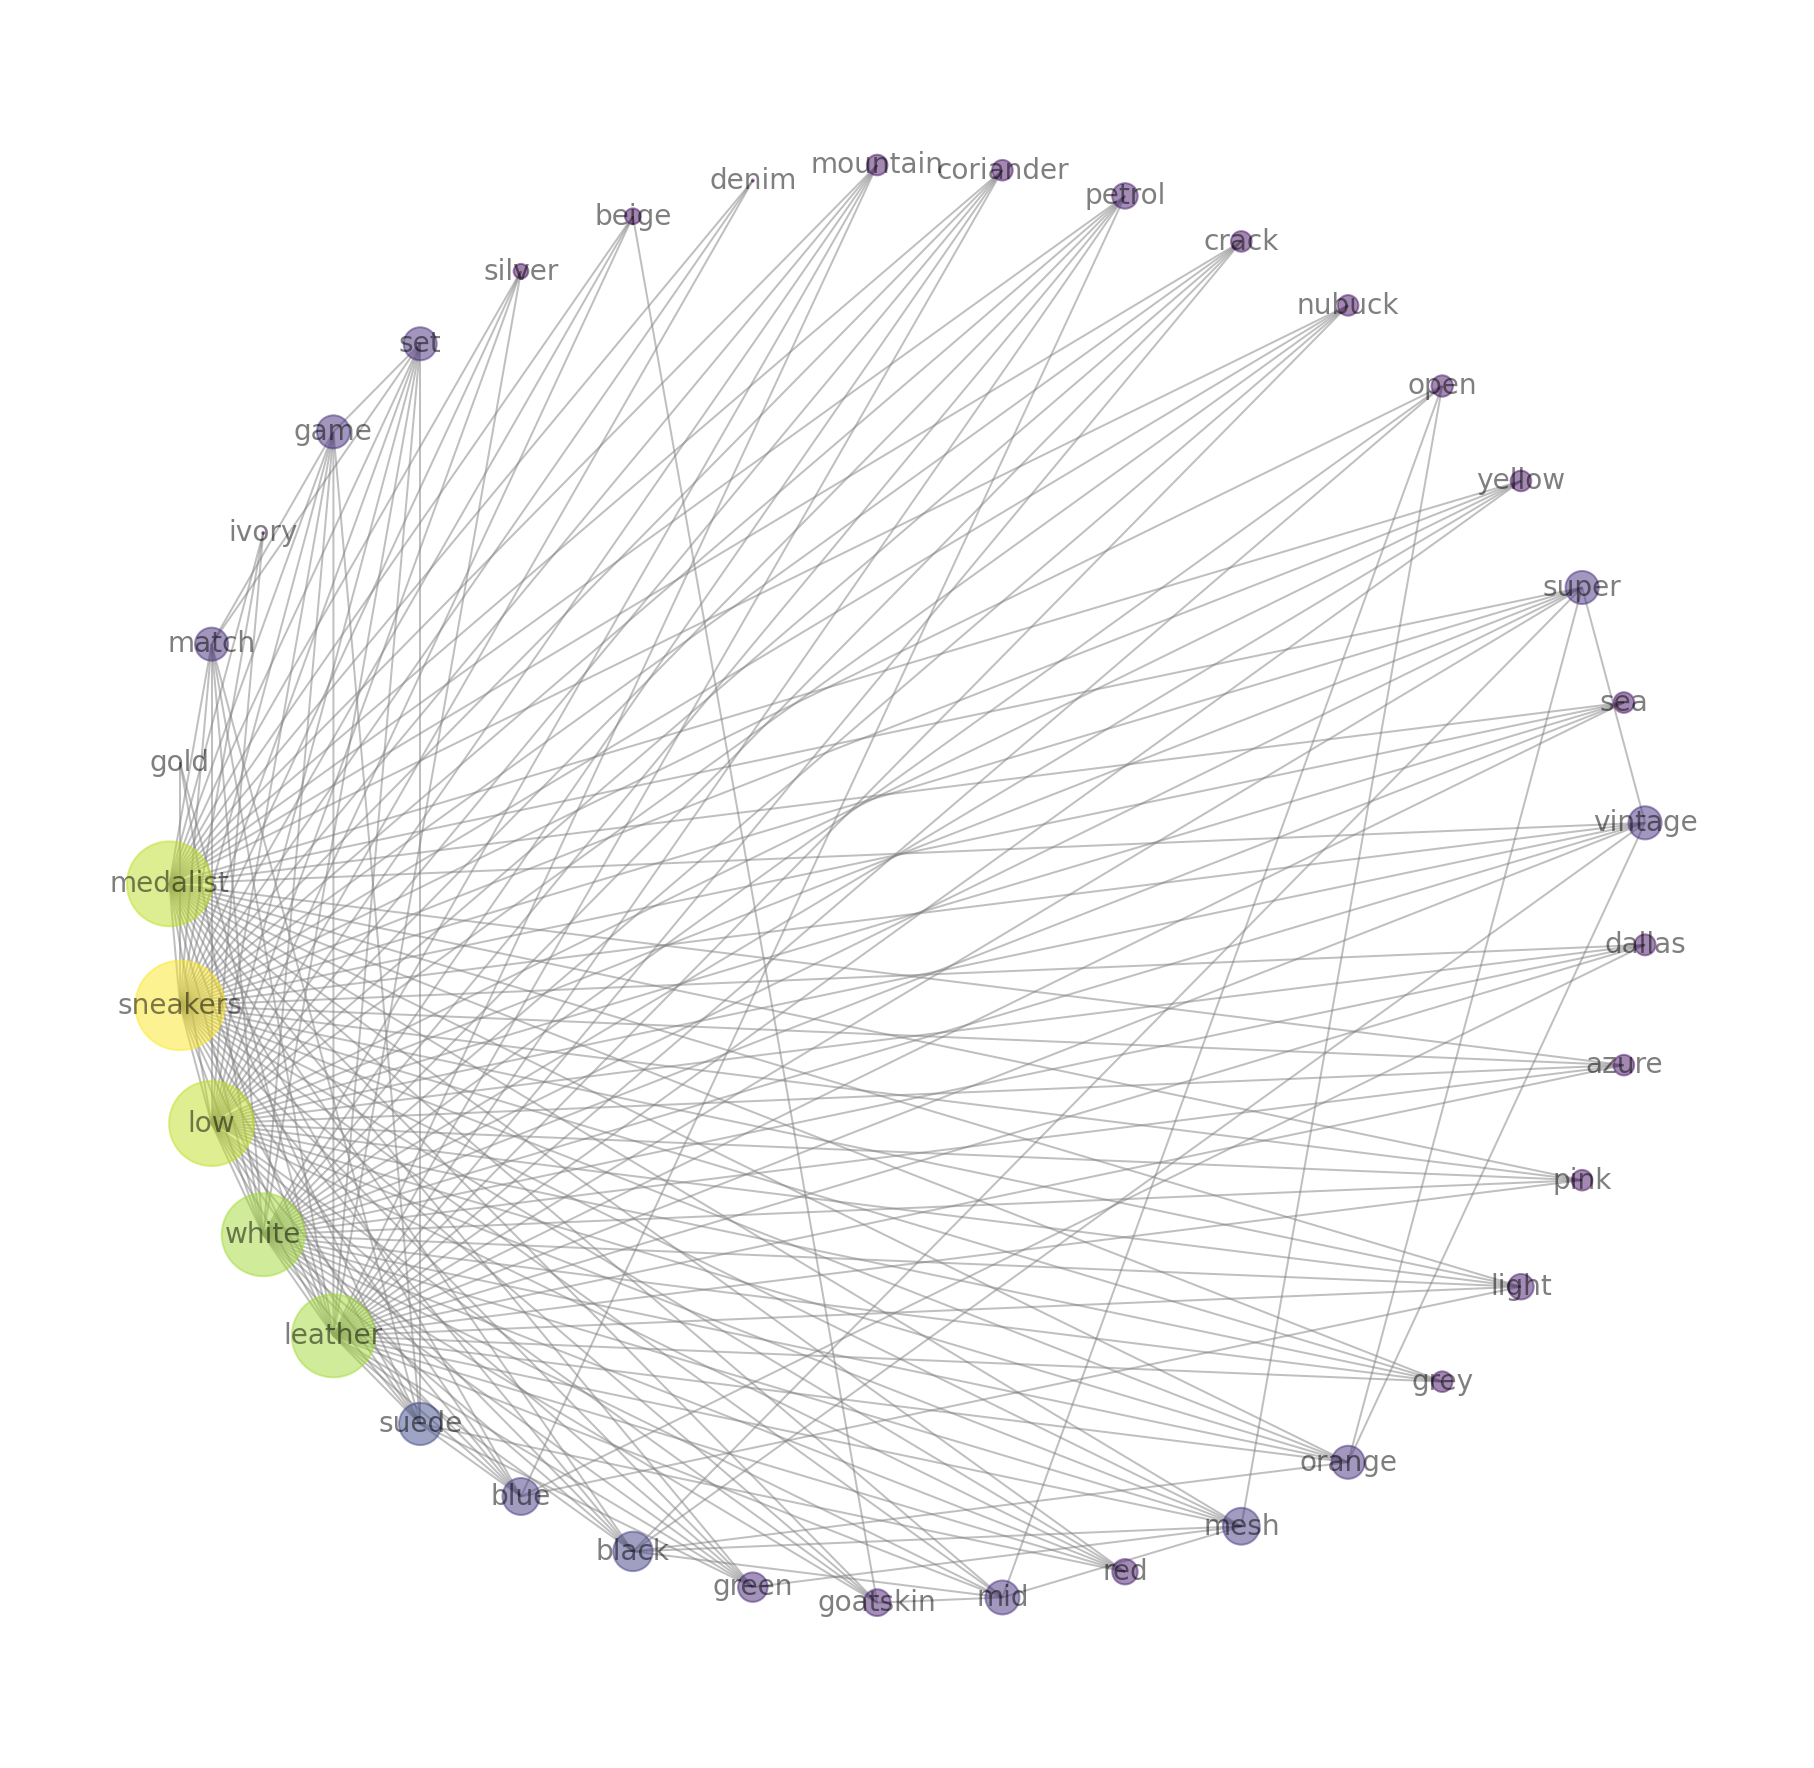

In [ ]:
# Autry
tokenizer = TreebankWordTokenizer()


data2_index=(data['브랜드']==Top10_brand[7])
data2=data[data2_index]
data_item=data2['제품명']
data_item=pd.DataFrame(data_item)
data_item=data_item['제품명'].str.replace(Top10_brand[7],'')
data_item=pd.DataFrame(data_item)

tokenized_list=[]

for text in data_item['제품명']:
  tokenized_list.append(tokenize_text(text))

result=(list(apriori(tokenized_list,min_support=0.01)))
df= pd.DataFrame(result)
df['length']=df['items'].apply(lambda x: len(x))
df= df[(df['length']== 2) & (df['support']>=0.01)].sort_values(by='support',ascending=False)

# networkx 그래프 정의
G = nx.Graph()
ar=(df['items'])
G.add_edges_from(ar)

#페이지랭크
pr = nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000 * (nsize-min(nsize))/(max(nsize)-min(nsize))

pos=nx.shell_layout(G) ##여기 nx. ( ) _ layout(G) 괄호부분 모양에따라 다양한 그래프 나옴

#그래프그리기
print("Autry")
print("\n-----------------------------------\n")
plt.figure(figsize=(16,16))
plt.axis('off')
nx.draw_networkx(G,font_family='KoPubDotum',pos=pos,font_size=14, node_color=list(pr.values()),node_size=nsize,alpha=0.5, edge_color='.5')
